<a id="top"></a>

# Credit Card Fraud (Classification)

# Outline

- [Read Data](#read_data)
- [Create target and features](#create_y_and_X)
- [Split data into train and test](#train_test_split)
- [View descriptive statistics](#descriptive_statistics)
- [View target and feature distributions](#distributions)
- [View correlations](#correlations)
- [View relationships between target and features](#pair_plots)
- [Standardize predictors](#standardize_predictors)
- [Predictive models](#predictive_models)
- [Logistic regression](#logistic_regression)
- [K-nearest neighbors](#k_nearest_neighbors)
- [Linear discriminant analysis](#linear_discriminant_analysis)
- [Support vector machines](#support_vector_machines)
- [Random Forest](#random_forest)
- [Compare models](#compare_models)
- [Oversampling](#oversampling)
- [Statsmodels](#statsmodels)

# Import packages

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

<a id="read_data"></a>

# [Read data](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data)

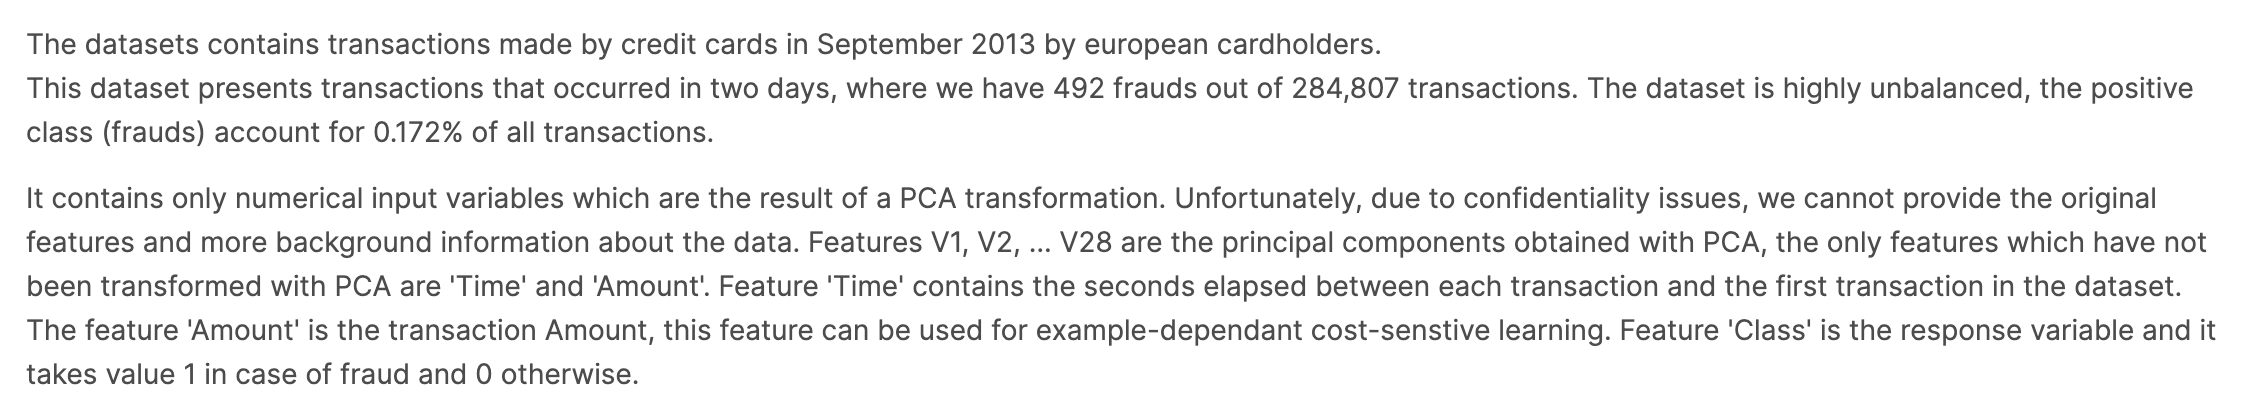

In [4]:
Image(filename='../images/credit_card_fraud_dataset_description.png', width=1000)

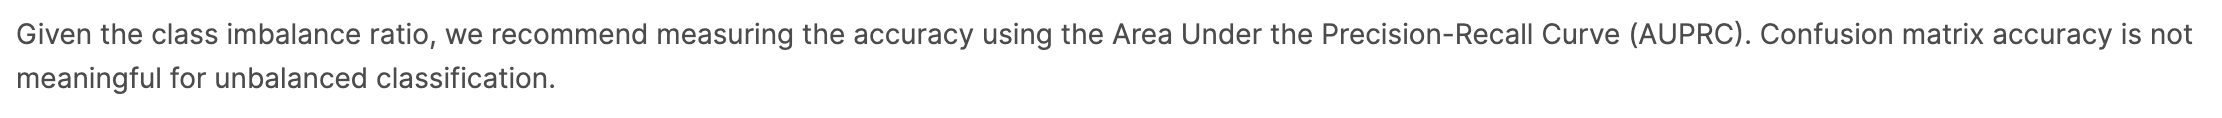

In [5]:
Image(filename='../images/credit_card_fraud_dataset_recommended_evaluation_metric.png', width=1000)

In [14]:
infile = 'https://github.com/cbrownley/2022MLWEEK_MLWITHPYTHON/blob/main/data/credit_card_fraud.csv.gz?raw=true'

In [15]:
df = pd.read_csv(infile, compression='gzip', header=0, sep=',', quotechar='"')

['{}: {}'.format(i, name) for (i, name) in enumerate(list(df.columns))]

['0: class',
 '1: v1',
 '2: v2',
 '3: v3',
 '4: v4',
 '5: v5',
 '6: v6',
 '7: v7',
 '8: v8',
 '9: v9',
 '10: v10',
 '11: v11',
 '12: v12',
 '13: v13',
 '14: v14',
 '15: v15',
 '16: v16',
 '17: v17',
 '18: v18',
 '19: v19',
 '20: v20',
 '21: v21',
 '22: v22',
 '23: v23',
 '24: v24',
 '25: v25',
 '26: v26',
 '27: v27',
 '28: v28',
 '29: log_amount']

In [17]:
df.head(10)

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,log_amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913
2,0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641
3,0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249
4,0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367
5,0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,1.300464
6,0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,1.607636
7,0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,3.708707
8,0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,4.534758
9,0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,1.303184


In [18]:
df.shape

(284807, 30)

In [19]:
pd.concat([df['class'].value_counts(), 
           df['class'].value_counts(normalize=True).round(5)], axis=1)

,class,class
0,284315,0.99827
1,492,0.00173


# Downsample to reduce model fitting time

In [20]:
y0_downsampled = df.loc[df['class'] == 0, :].sample(frac=0.05, replace=False, random_state=1)
y1_downsampled = df.loc[df['class'] == 1, :].sample(frac=0.05, replace=False, random_state=1)

In [21]:
df_downsampled = pd.concat([y0_downsampled, y1_downsampled], axis=0)

In [22]:
pd.concat([df_downsampled['class'].value_counts(), 
           df_downsampled['class'].value_counts(normalize=True).round(5)], axis=1)

,class,class
0,14216,0.99824
1,25,0.00176


<a id="create_y_and_X"></a>

# Create target, y, and predictor, X, variables

In [23]:
neg, pos = np.bincount(df_downsampled['class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.3f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 14241
    Positive: 25 (0.176% of total)



In [24]:
X = df_downsampled.iloc[:, 1:].values
y = df_downsampled['class'].values.astype(int)

y_labels = ['Not Fraud', 'Fraud']

print('Class labels:', np.unique(y), y_labels, [(i, val) for (i, val) in enumerate(np.bincount(y))])

Class labels: [0 1] ['Not Fraud', 'Fraud'] [(0, 14216), (1, 25)]


<a id="train_test_split"></a>

# Split data into train and test sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
X_train

array([[-0.08269851,  0.94647664, -0.95405519, ..., -0.03486101,
         0.03945203,  4.21436214],
       [-1.32416099, -0.53624985,  0.84293343, ..., -0.03793072,
        -0.1785678 ,  5.43677846],
       [-0.73154399,  1.32884249,  1.29509562, ...,  0.0459347 ,
         0.1365257 ,  3.60307644],
       ...,
       [ 1.74604528, -1.62079938,  0.20883578, ...,  0.06399062,
         0.00804578,  5.11560173],
       [-3.81603381, -1.49266164, -1.46735804, ..., -0.63973237,
         0.02706764,  5.50338248],
       [-0.44796771,  1.02319169, -0.15177005, ..., -0.9975166 ,
        -0.55423174,  0.25541711]])

In [27]:
print('Labels counts in y:',       np.bincount(y),       
      [round(cnt / np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train), 
      [round(cnt / np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Labels counts in y_test:',  np.bincount(y_test),  
      [round(cnt / np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

Labels counts in y: [14216    25] [99.8, 0.2]
Labels counts in y_train: [9951   17] [99.8, 0.2]
Labels counts in y_test: [4265    8] [99.8, 0.2]


<a id="descriptive_statistics"></a>

# View descriptive statistics

In [28]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)), 
                    columns=list(df.columns))

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
class,9968.0,0.00,0.04,0.00,0.00,0.00,0.00,1.00
v1,9968.0,-0.02,1.97,-30.82,-0.90,-0.01,1.30,2.45
v2,9968.0,-0.01,1.71,-35.62,-0.59,0.07,0.81,14.85
v3,9968.0,0.00,1.53,-27.75,-0.85,0.18,1.02,4.02
v4,9968.0,0.01,1.44,-4.84,-0.85,-0.01,0.77,11.19
v5,9968.0,-0.00,1.45,-28.36,-0.70,-0.05,0.61,22.71
v6,9968.0,-0.01,1.34,-13.36,-0.77,-0.29,0.39,17.02
v7,9968.0,0.01,1.31,-23.19,-0.54,0.05,0.59,30.90
v8,9968.0,-0.02,1.33,-37.35,-0.21,0.02,0.31,17.57
v9,9968.0,-0.00,1.09,-8.63,-0.64,-0.06,0.59,10.39


<a id="distributions"></a>

# View target distribution

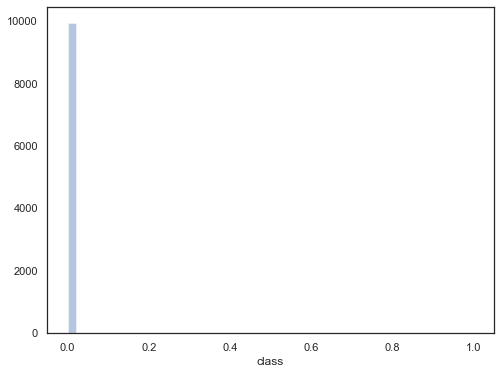

In [29]:
plt.subplots(figsize=(8,6))
sns.distplot(data['class'], kde=False);

# View predictor distributions by target category

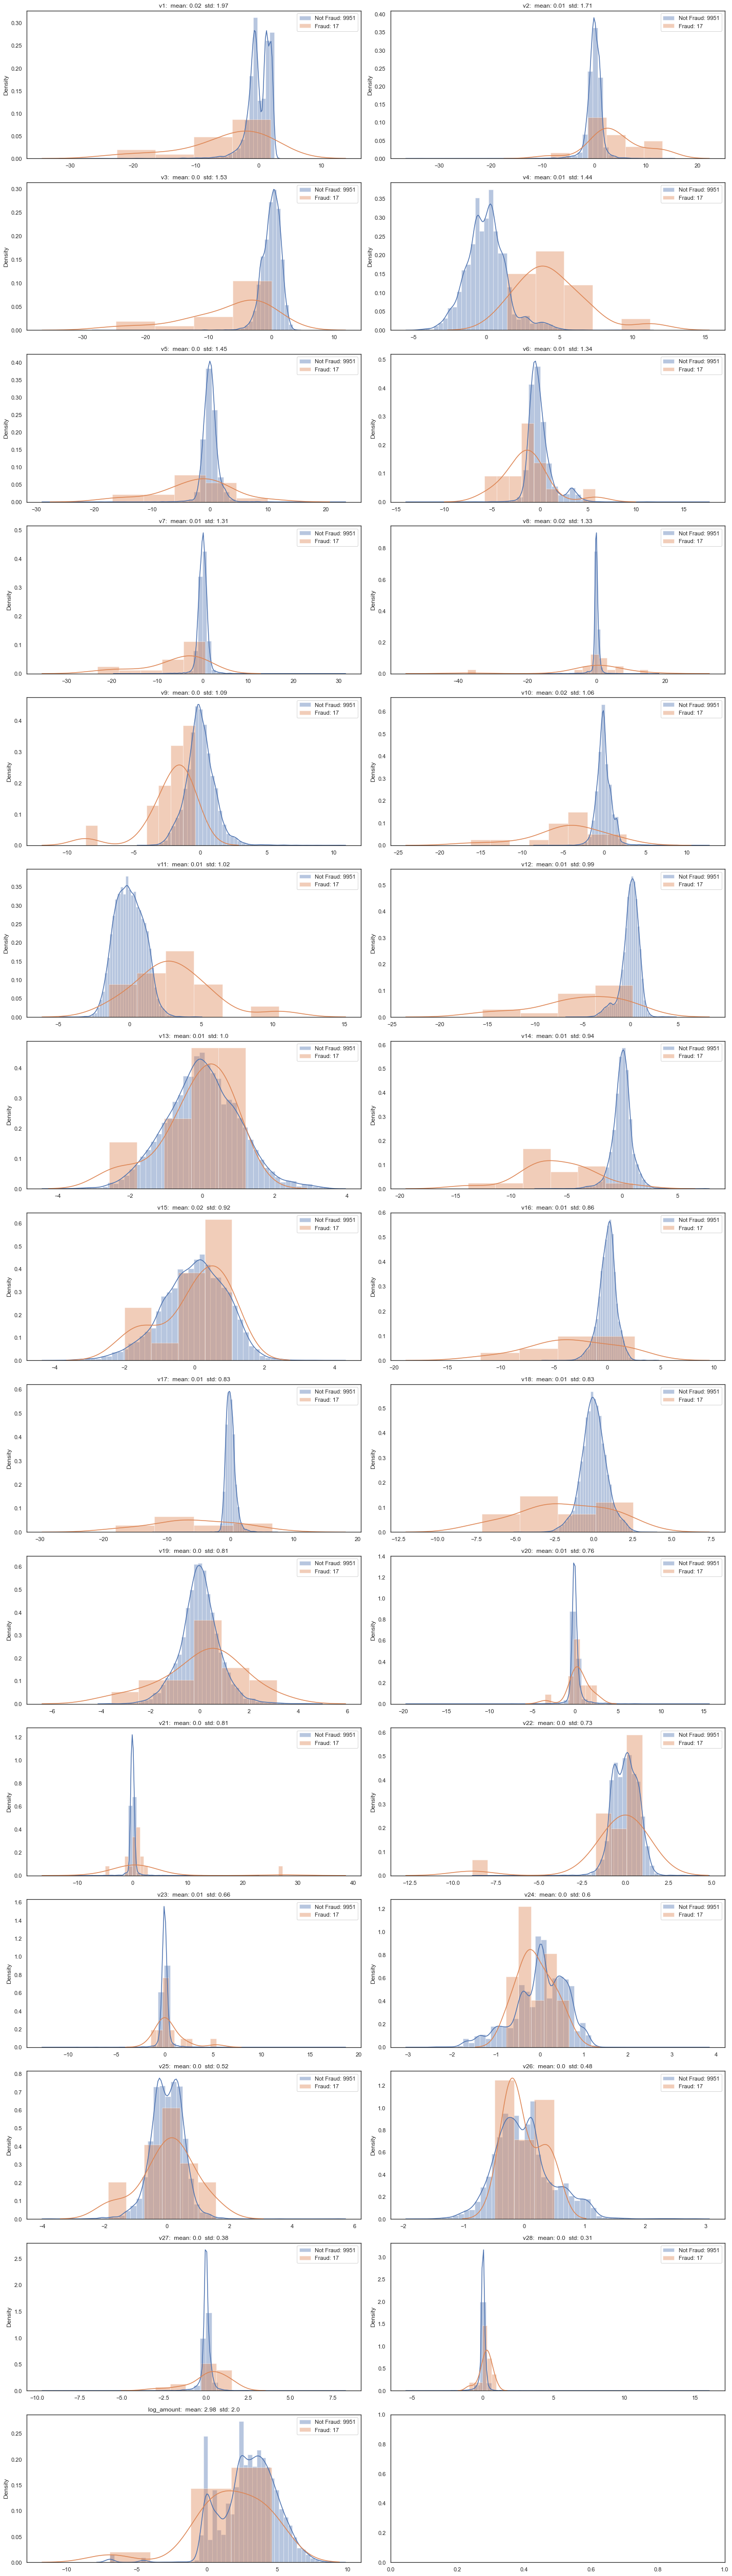

In [30]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format('Not Fraud', len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format('Fraud',     len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(data.columns)[i+1], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

<a id="correlations"></a>

# View predictor correlations

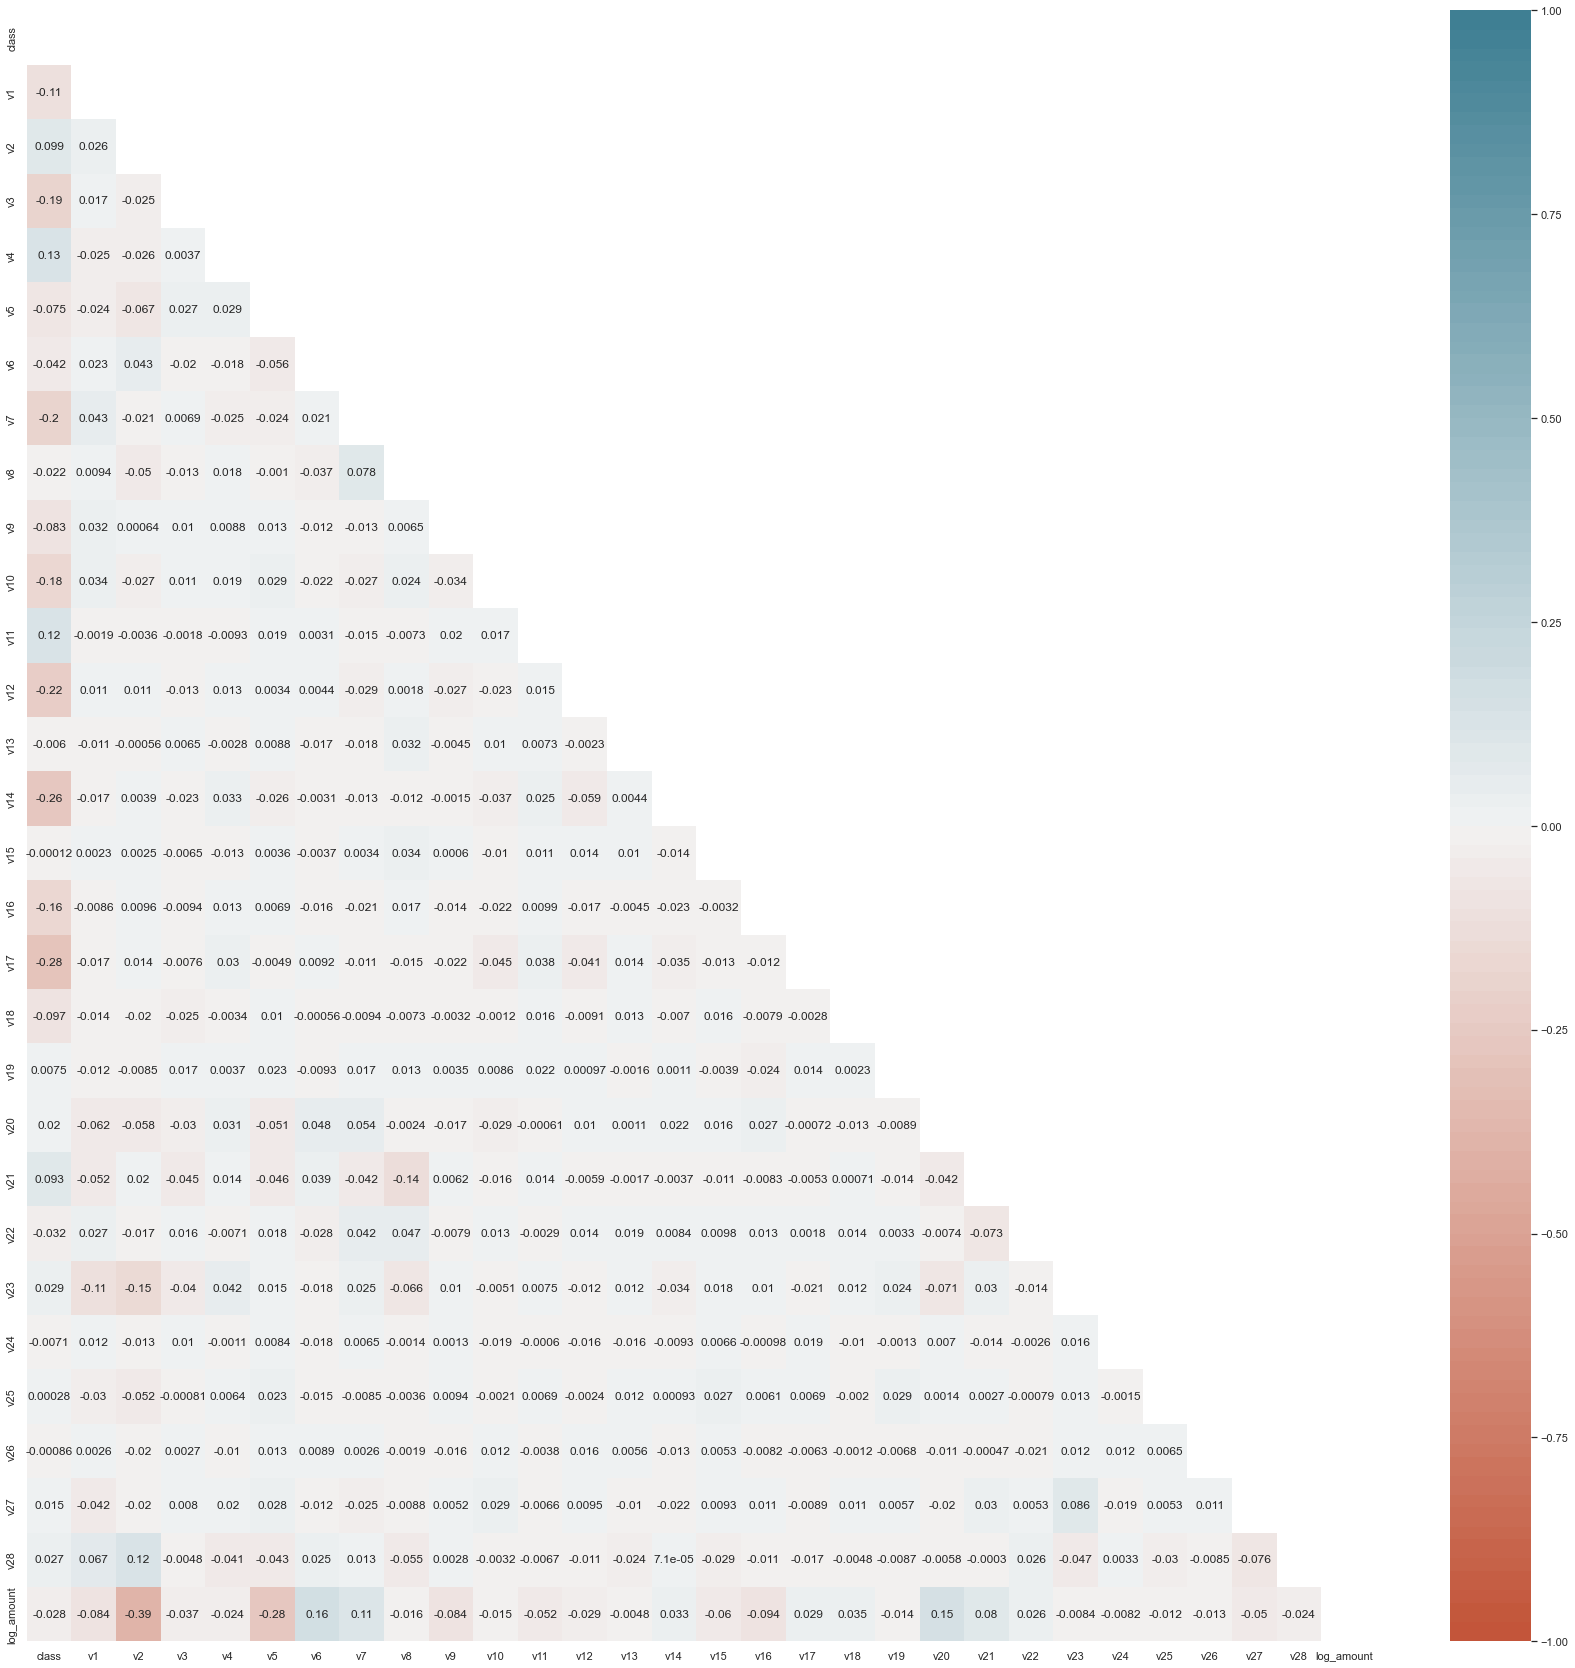

In [31]:
plt.figure(figsize=(30, 30))

matrix = np.triu(data.corr())
sns.heatmap(data.corr(), 
            annot=True, fmt='.2g', 
            mask=matrix, 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=100));

<a id="pair_plots"></a>

# Visualize distributions of, and relationships between, target and predictors

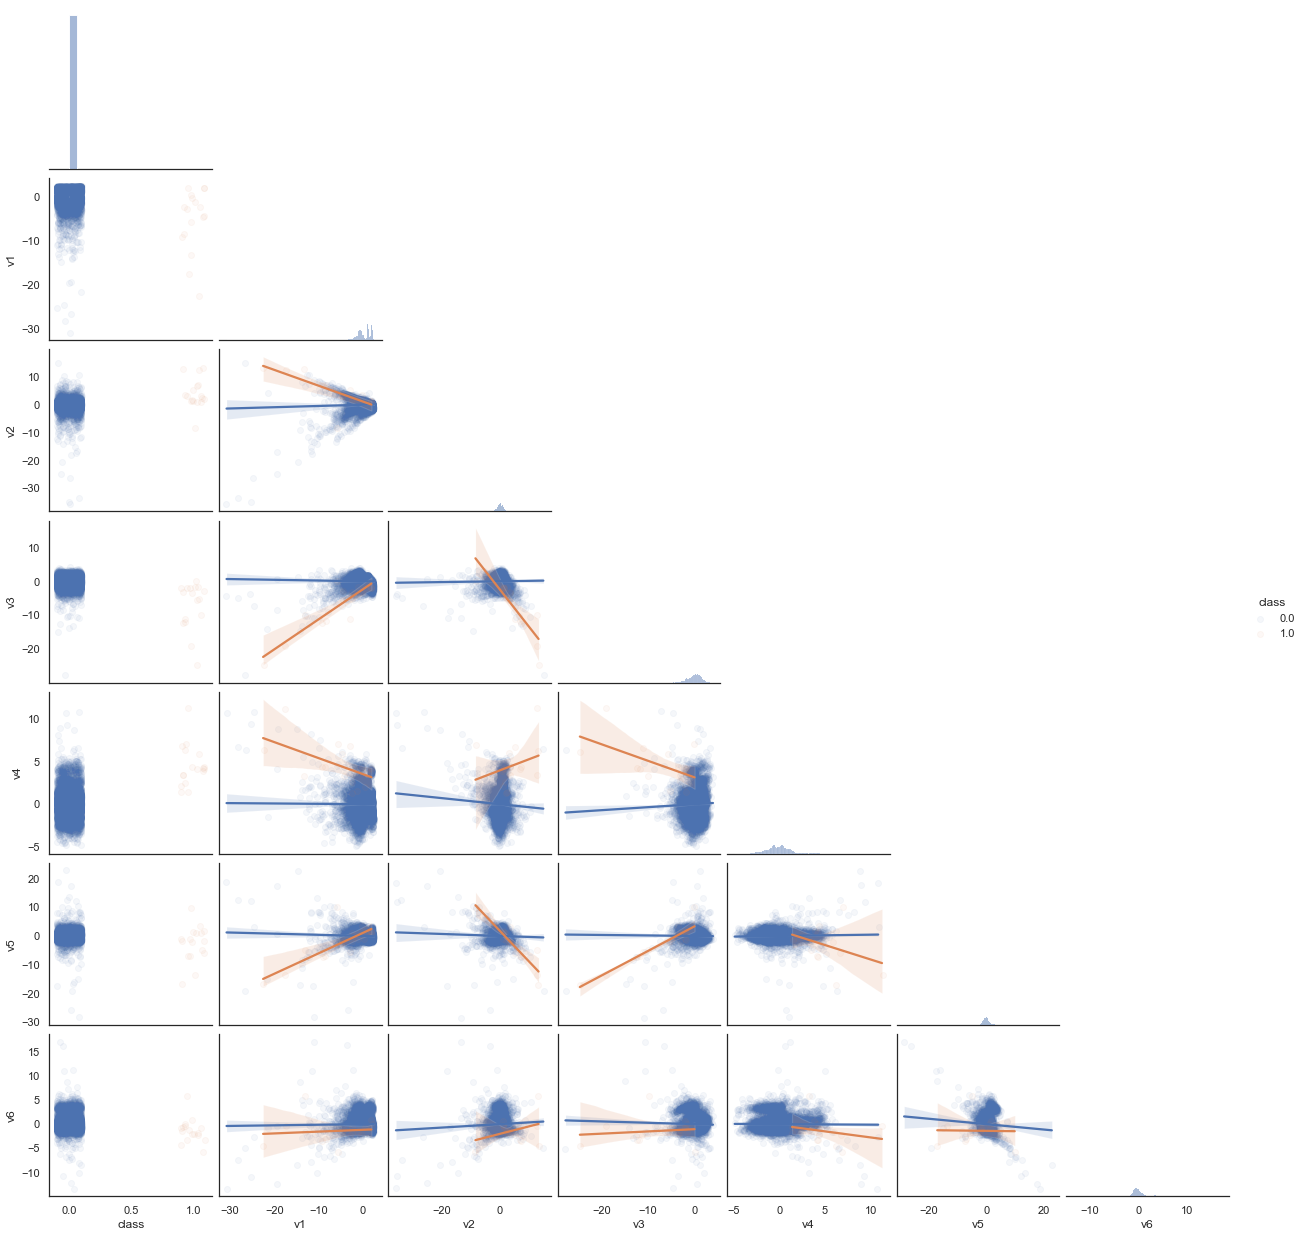

In [32]:
sns.pairplot(data.iloc[:, :7], 
             vars=list(data.columns)[:7], 
             kind='reg',
             diag_kind='hist',
             hue='class', 
             # markers=['o', 's'], 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

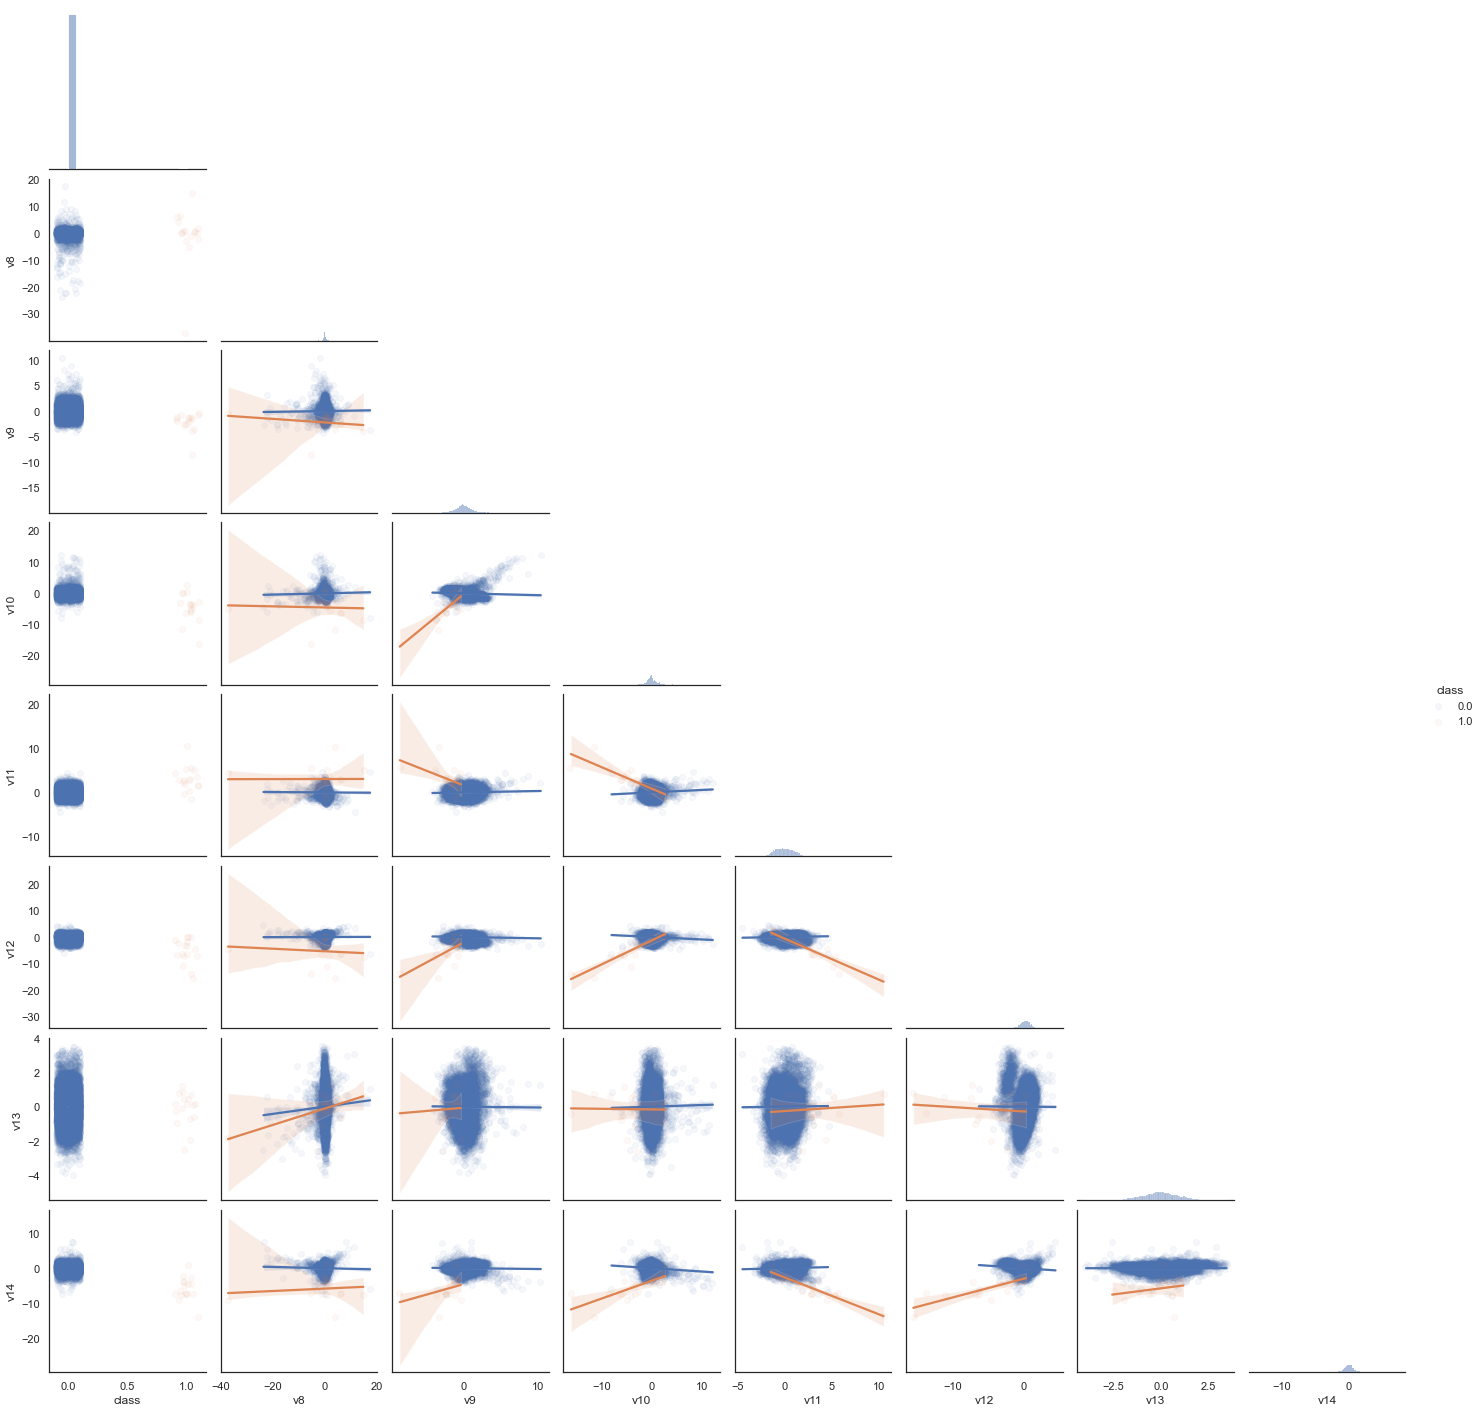

In [33]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 8:15]], axis=1), 
             vars=[list(data.columns)[0]]+list(data.columns)[8:15], 
             kind='reg',
             diag_kind='hist',
             hue='class', 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

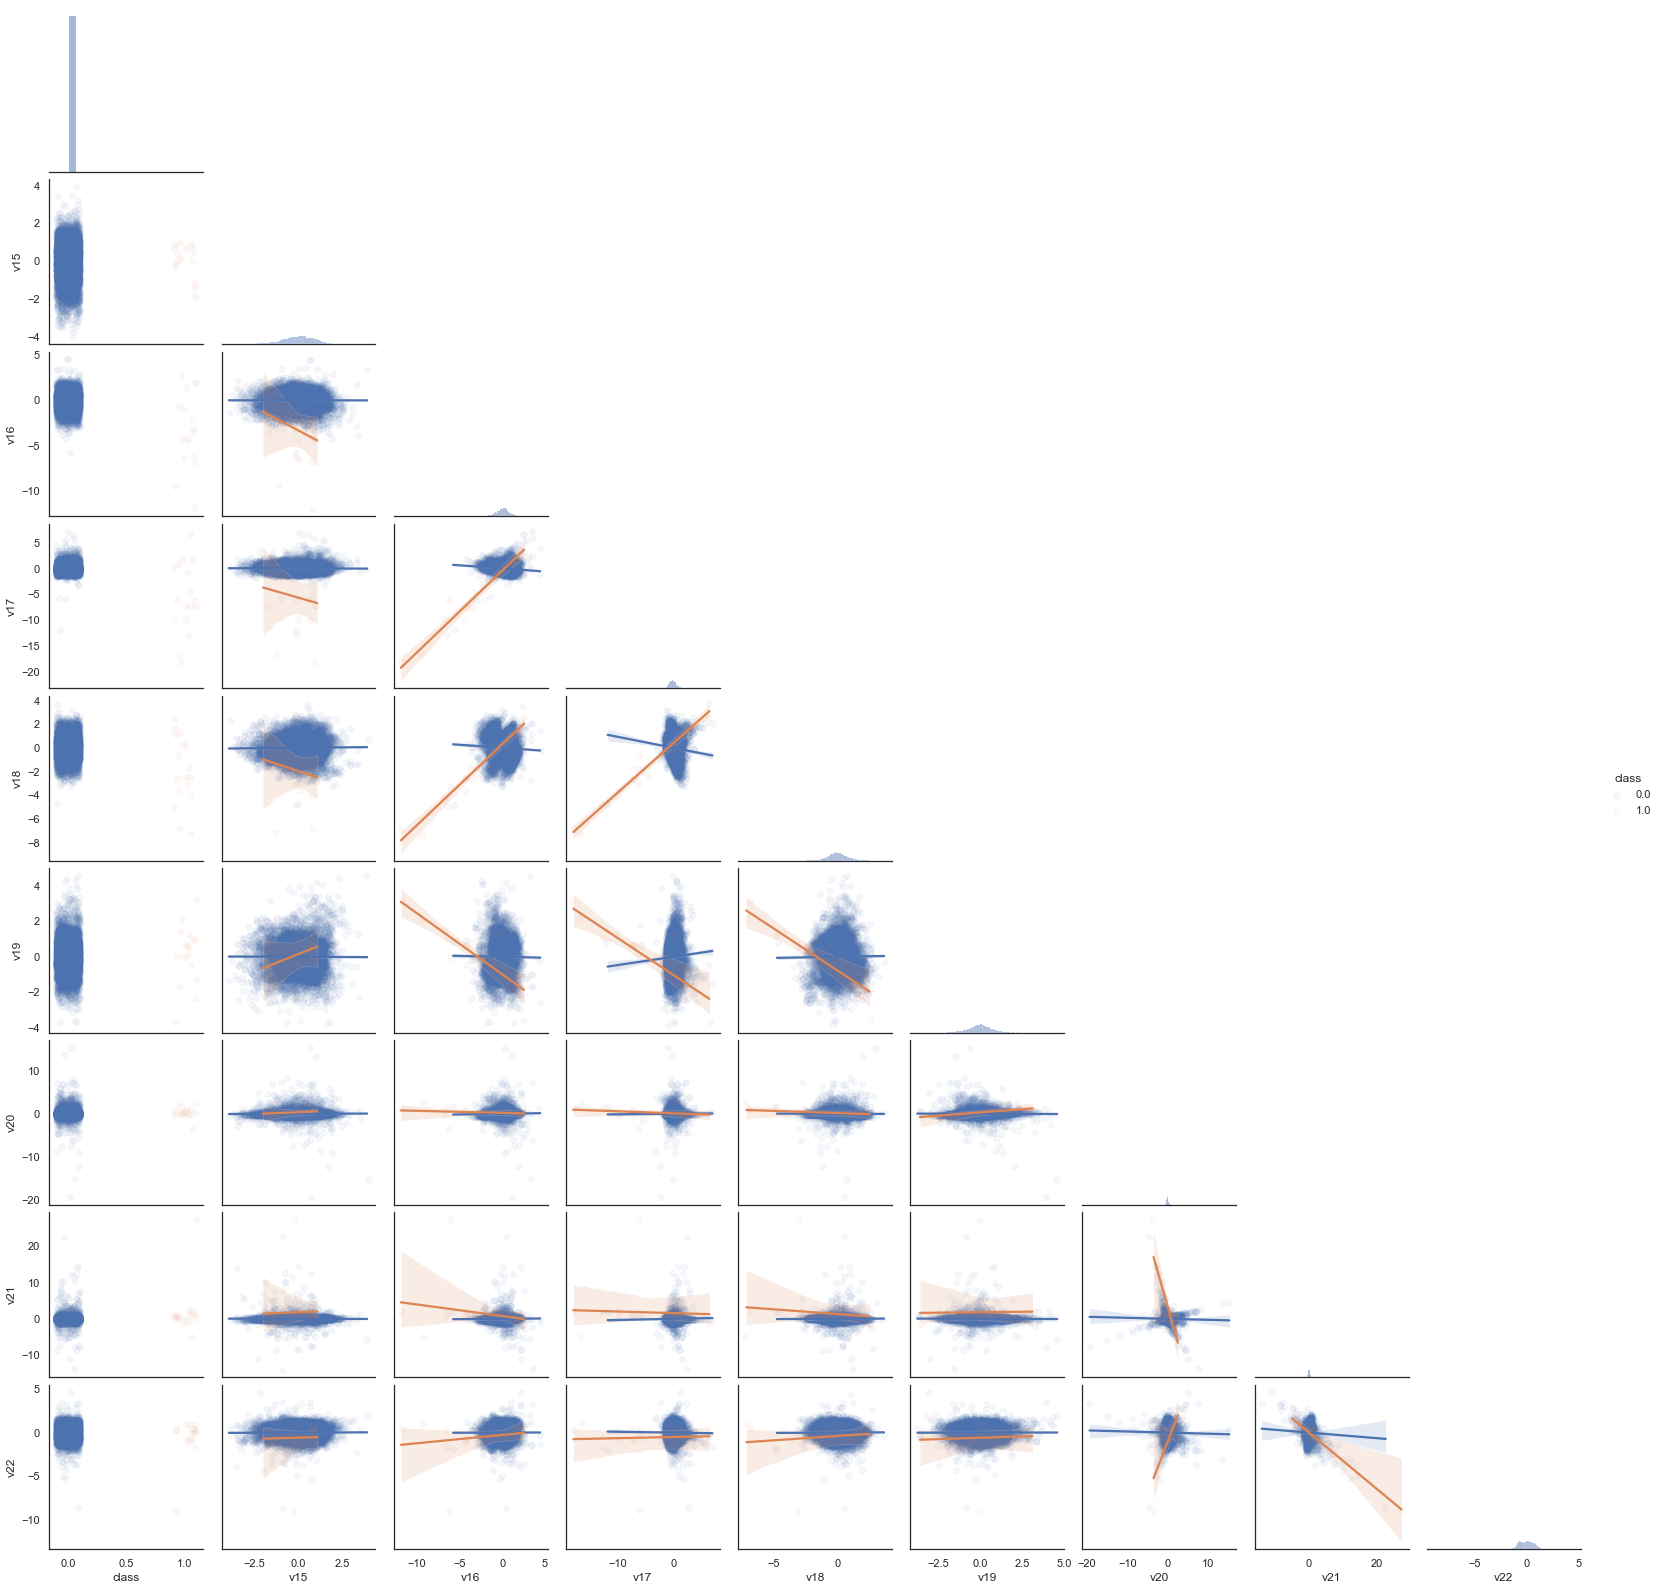

In [34]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 15:23]], axis=1), 
             vars=[list(data.columns)[0]]+list(data.columns)[15:23], 
             kind='reg',
             diag_kind='hist',
             hue='class', 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

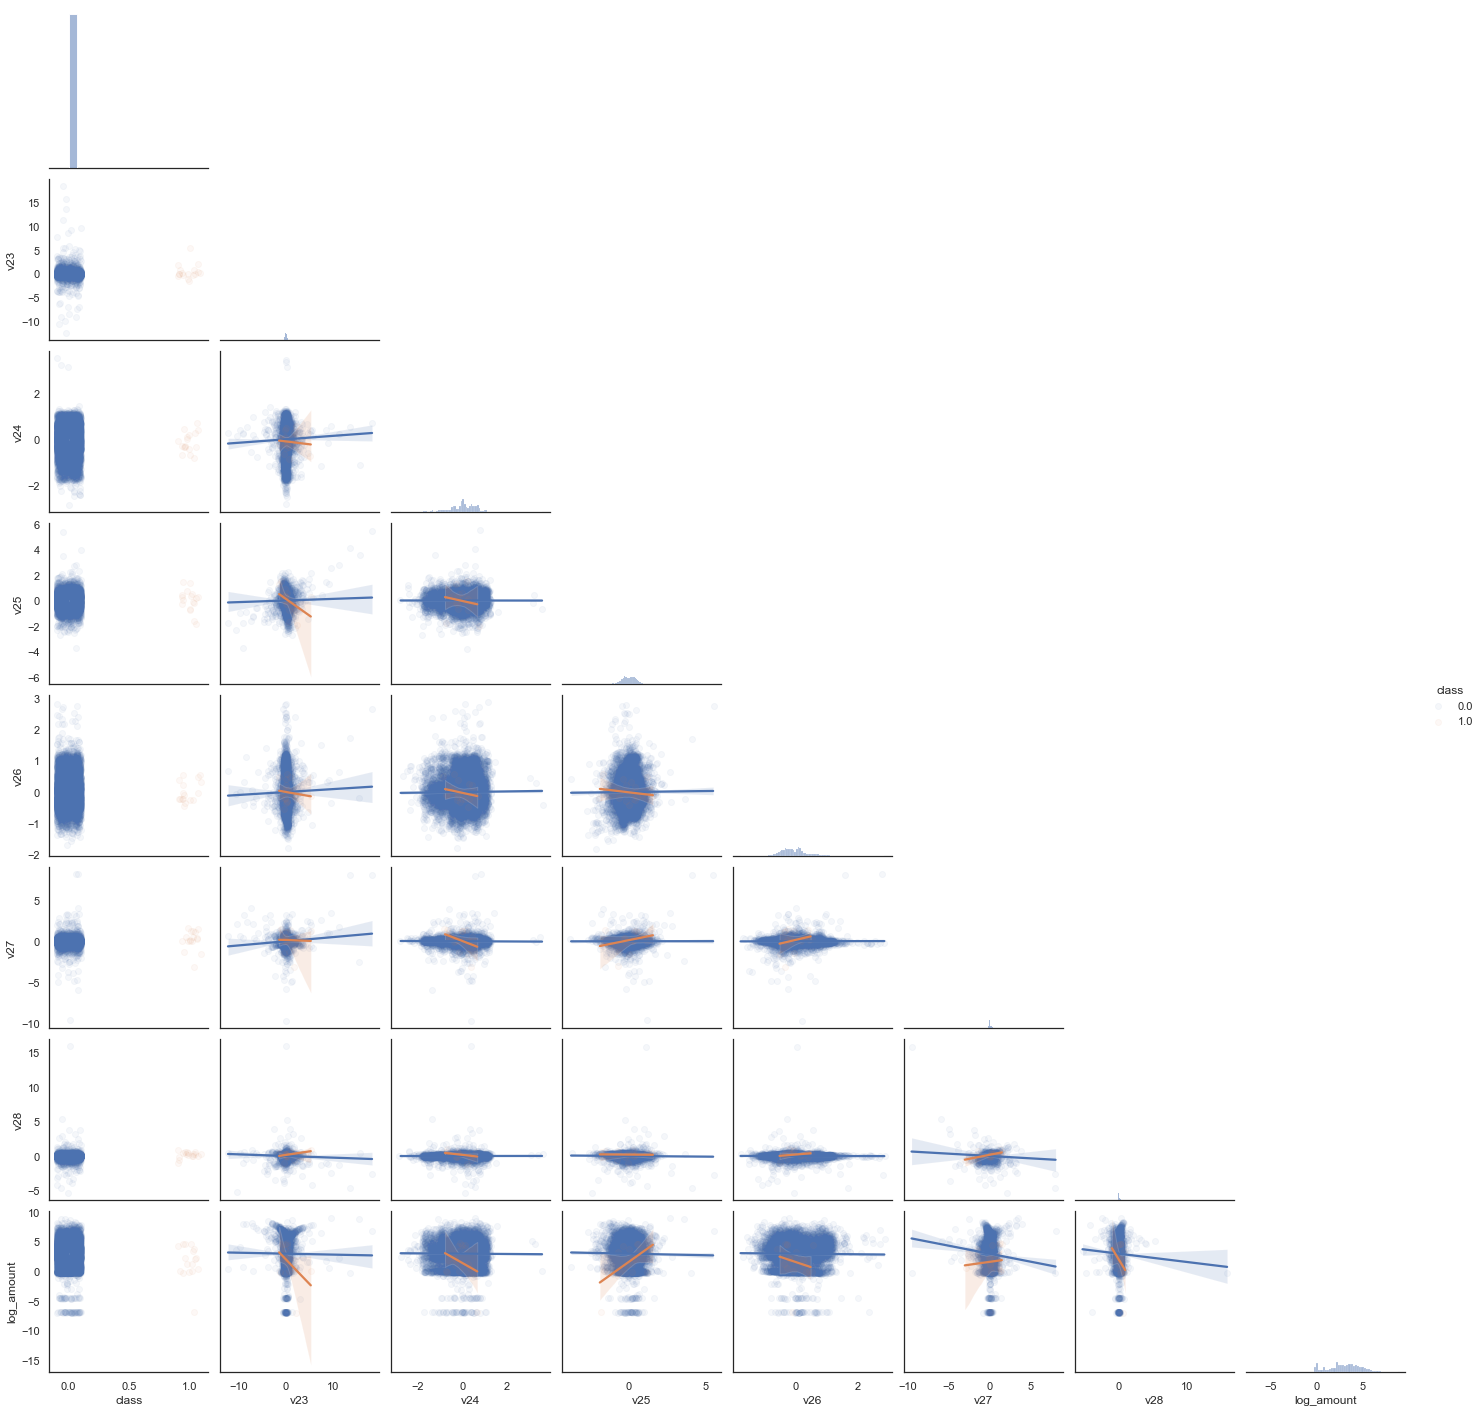

In [35]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 23:]], axis=1), 
             vars=[list(data.columns)[0]]+list(data.columns)[23:], 
             kind='reg',
             diag_kind='hist',
             hue='class', 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

<a id="standardize_predictors"></a>

# [Standardize](https://scikit-learn.org/stable/modules/preprocessing.html) the Predictors

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

# View standardized predictor distributions by target category

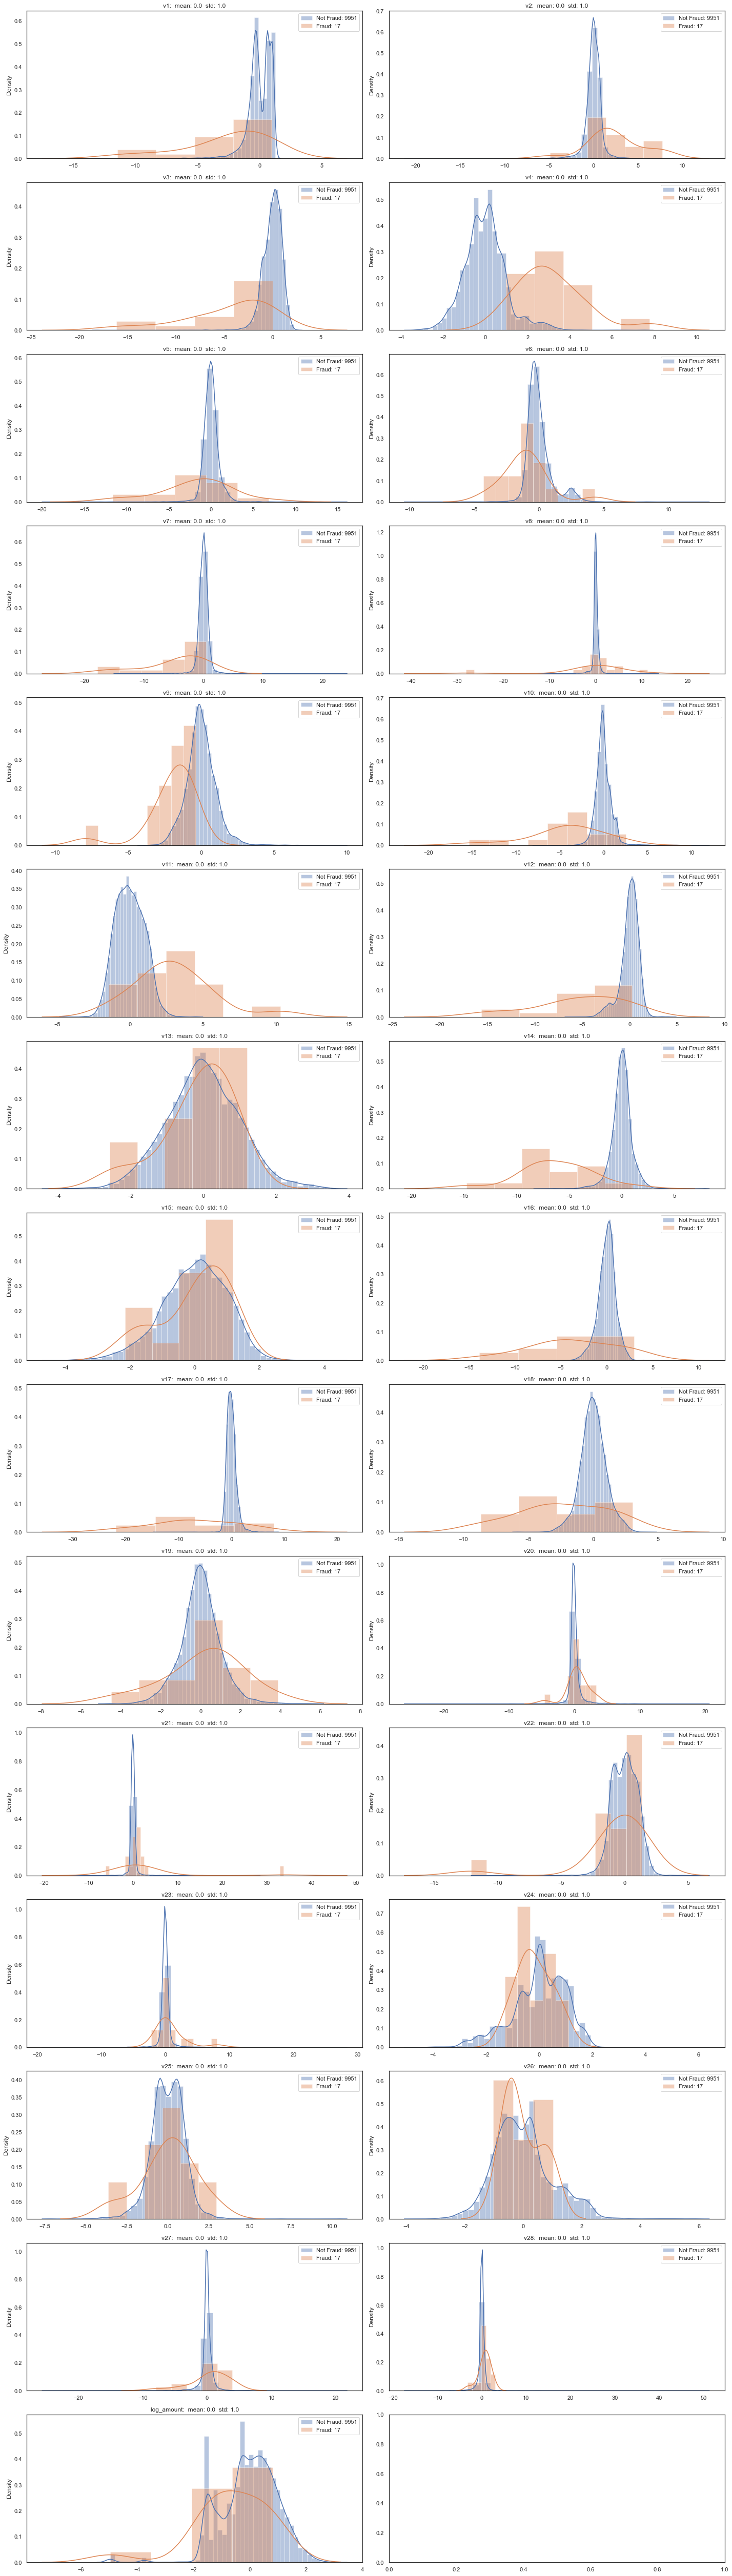

In [37]:
f, axs = plt.subplots(15, 2, figsize=(20,70))

for i, feat in enumerate(X_train_std.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format('Not Fraud', len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format('Fraud',     len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(data.columns)[i+1], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

<a id="predictive_models"></a>

# Predictive Models

# [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) estimator

In [38]:
from sklearn.dummy import DummyClassifier

d_clf = DummyClassifier(strategy='constant', constant=0)
d_clf.fit(X_train_std, y_train)

print('Accuracy (train): {:.3f}'.format(d_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.3f}'.format(d_clf.score(X_test_std,  y_test)))

Accuracy (train): 0.998
Accuracy  (test): 0.998


# [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

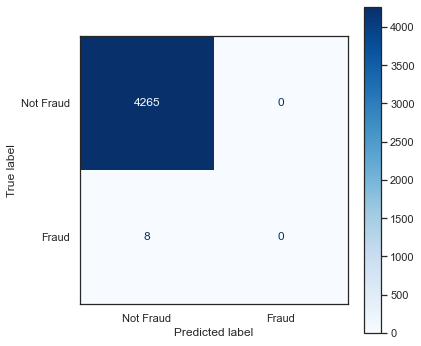

In [39]:
from sklearn.metrics import plot_confusion_matrix

f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(d_clf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # for float: '.2g'
                      normalize=None);

# [Classification report](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)

In [40]:
from sklearn.metrics import classification_report

y_pred = d_clf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       0.00      0.00      0.00         8

    accuracy                           1.00      4273
   macro avg       0.50      0.50      0.50      4273
weighted avg       1.00      1.00      1.00      4273



# [ROC curve](https://scikit-learn.org/stable/auto_examples/plot_roc_curve_visualization_api.html)

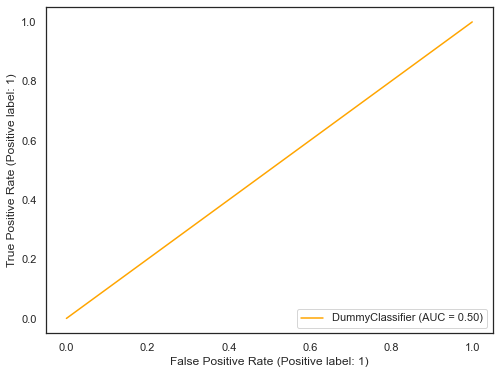

In [41]:
from sklearn.metrics import plot_roc_curve

f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(d_clf, X_test_std, y_test, ax=ax, color='orange');

<a id="logistic_regression"></a>

# [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [42]:
from sklearn.linear_model import LogisticRegressionCV

# Cs: Each of the values in Cs describes the inverse of regularization strength

# L1 Ratio: A value of 0 is equivalent to using penalty='l2'
#           A value of 1 is equivalent to using penalty='l1'
#           For 0 < l1_ratio <1, the penalty is a combination of L1 and L2
lr_clf = LogisticRegressionCV(cv=3, 
                              penalty='elasticnet', solver='saga', 
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)), 
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float), 
                              max_iter=1000, 
                              random_state=0, 
                              n_jobs=3)

start = time()
lr_clf.fit(X_train_std, y_train)
lr_duration = time() - start

print("LogisticRegressionCV took {:.2f} seconds for {} cv iterations with {} parameter settings.".format(lr_duration, 
                                                                                                         lr_clf.n_iter_.shape[1], 
                                                                                                         lr_clf.n_iter_.shape[2] * lr_clf.n_iter_.shape[3]))

print('Optimal regularization strength: {}  Optimal L1 Ratio: {}'.format(lr_clf.C_[0], lr_clf.l1_ratio_[0]))
print('Accuracy (train): {:.2f}'.format(lr_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(lr_clf.score(X_test_std,  y_test)))

LogisticRegressionCV took 42.28 seconds for 3 cv iterations with 24 parameter settings.
Optimal regularization strength: 1.0  Optimal L1 Ratio: 0.0
Accuracy (train): 1.00
Accuracy  (test): 1.00


## Model parameters

In [43]:
lr_params = dict(zip(list(data.columns)[1:], list(lr_clf.coef_[0])), 
                 intercept=lr_clf.intercept_[0])
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}

{'v1': 0.89,
 'v4': 0.75,
 'v5': 0.51,
 'v28': 0.39,
 'v27': 0.31,
 'v24': 0.22,
 'v22': 0.21,
 'v23': 0.11,
 'v13': 0.1,
 'v20': 0.08,
 'v11': 0.05,
 'v21': 0.03,
 'v16': 0.0,
 'v26': -0.01,
 'v18': -0.04,
 'v2': -0.1,
 'v3': -0.1,
 'v10': -0.18,
 'v25': -0.19,
 'v7': -0.31,
 'v6': -0.31,
 'v12': -0.36,
 'log_amount': -0.38,
 'v8': -0.39,
 'v15': -0.42,
 'v19': -0.45,
 'v9': -0.5,
 'v17': -0.56,
 'v14': -1.06,
 'intercept': -9.76}

## Predicted class labels

In [44]:
predicted_class_labels = lr_clf.predict(X_test_std)
predicted_class_labels

array([0, 0, 0, ..., 0, 0, 0])

## Predicted probabilities of class labels

In [45]:
predicted_class_probabilities = lr_clf.predict_proba(X_test_std)
[dict(zip(['Not Fraud(0)', 'Fraud(1)'], map(lambda val: val.round(3), list(arr))), obs_id=i) 
 for (i, arr) in enumerate(list(predicted_class_probabilities))]

[{'Not Fraud(0)': 0.999, 'Fraud(1)': 0.001, 'obs_id': 0},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 1},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 2},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 3},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 4},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 5},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 6},
 {'Not Fraud(0)': 0.999, 'Fraud(1)': 0.001, 'obs_id': 7},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 8},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 9},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 10},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 11},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 12},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 13},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 14},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 15},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 16},
 {'Not Fraud(0)': 1.0, 'Fraud(1)': 0.0, 'obs_id': 17},
 {'Not Fraud

## Cross-validation score on test set

In [46]:
from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)  # np.where(lb < 0, 0, lb), np.where(ub > 1, 1, ub)
    s.name = model_name
    return s

In [47]:
lr_cv = get_cross_val(lr_clf, X_test_std, y_test, 'logistic regression')
lr_cv.round(2)

mean                  0.53
standard deviation    0.28
p025                  0.05
p975                  0.79
Name: logistic regression, dtype: float64

## Confusion matrix

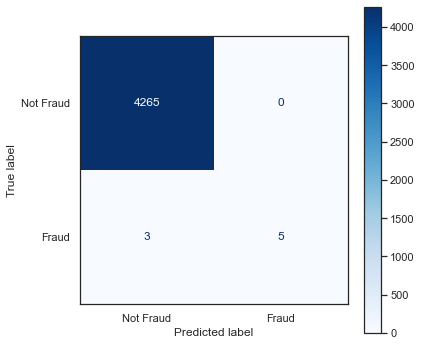

In [48]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(lr_clf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [49]:
y_pred = lr_clf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



## A collection of metrics for comparing models

In [50]:
def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc     = accuracy_score(y_true, y_pred)
    pre     = precision_score(y_true, y_pred)
    rec     = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    ck      = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',  
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s

In [51]:
lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'logistic_regression')
lr_metrics

accuracy                                                 0.999298
precision                                                     1.0
recall                                                      0.625
roc_auc                                                    0.8125
f1_score                                                 0.769231
cohen_kappa                                              0.768898
precision_both                          [0.9992970946579194, 1.0]
recall_both                                          [1.0, 0.625]
fbeta_both               [0.9996484237665534, 0.7692307692307693]
support_both                                            [4265, 8]
time_to_fit (seconds)                                   42.276389
Name: logistic_regression, dtype: object

## ROC curve

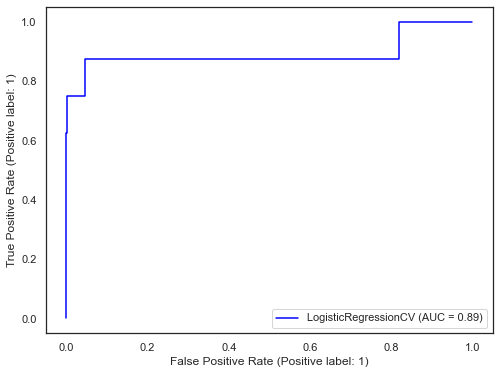

In [52]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(lr_clf, X_test_std, y_test, ax=ax, color='blue');

<a id="k_nearest_neighbors"></a>

# K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1,16)}

knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, param_grid=param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_duration = time() - start

print("GridSearchCV of KNN took {:.2f} seconds for {} candidate parameter settings.".format(knn_duration, 
                                                                                            len(gs_knn.cv_results_['params'])))
# report(gs_knn.cv_results_)
print('Optimal weights: {}  Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('Accuracy (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_knn.score(X_test_std,  y_test)))

GridSearchCV of KNN took 8.96 seconds for 30 candidate parameter settings.
Optimal weights: distance  Optimal n_neighbors: 7
Accuracy (train): 1.00
Accuracy  (test): 1.00


## Best parameters

In [54]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'distance'}


## Cross-validation score on test set

In [55]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

mean                  0.73
standard deviation    0.39
p025                  0.07
p975                  1.00
Name: k-nearest neighbors, dtype: float64

## Confusion matrix

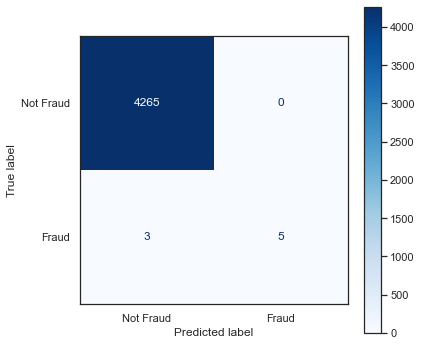

In [56]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_knn, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [57]:
y_pred = gs_knn.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



## A collection of metrics for comparing models

In [58]:
knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics

accuracy                                                 0.999298
precision                                                     1.0
recall                                                      0.625
roc_auc                                                    0.8125
f1_score                                                 0.769231
cohen_kappa                                              0.768898
precision_both                          [0.9992970946579194, 1.0]
recall_both                                          [1.0, 0.625]
fbeta_both               [0.9996484237665534, 0.7692307692307693]
support_both                                            [4265, 8]
time_to_fit (seconds)                                     8.96375
Name: k-nearest neighbors, dtype: object

## ROC curve

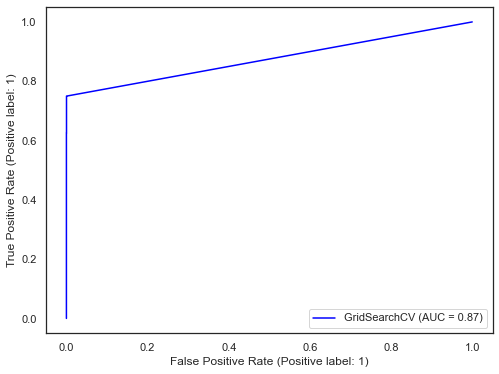

In [59]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_knn, X_test_std, y_test, ax=ax, color='blue');

<a id="linear_discriminant_analysis"></a>

# Linear Discriminant Analysis

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'], 
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda.fit(X_train_std, y_train)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration, 
                                                                                            len(gs_lda.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_lda.score(X_test_std,  y_test)))

GridSearchCV of LDA took 0.56 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: None  Optimal n_components: 1
Accuracy (train): 1.00
Accuracy  (test): 1.00


## Cross-validation score on test set

In [61]:
lda_cv = get_cross_val(lda_clf, X_test_std, y_test, 'linear discriminanat analysis')
lda_cv.round(2)

mean                  0.76
standard deviation    0.13
p025                  0.67
p975                  0.98
Name: linear discriminanat analysis, dtype: float64

## Confusion matrix

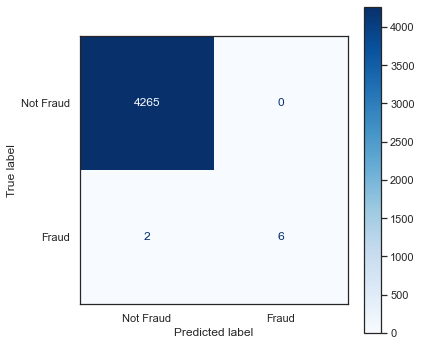

In [62]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_lda, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [63]:
y_pred = gs_lda.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.75      0.86         8

    accuracy                           1.00      4273
   macro avg       1.00      0.88      0.93      4273
weighted avg       1.00      1.00      1.00      4273



## A collection of metrics for comparing models

In [64]:
lda_metrics = calculate_metrics(y_test, y_pred, lda_duration, 'linear discriminant analysis')
lda_metrics

accuracy                                                 0.999532
precision                                                     1.0
recall                                                       0.75
roc_auc                                                     0.875
f1_score                                                 0.857143
cohen_kappa                                              0.856913
precision_both                           [0.999531286618233, 1.0]
recall_both                                           [1.0, 0.75]
fbeta_both               [0.9997655883731834, 0.8571428571428571]
support_both                                            [4265, 8]
time_to_fit (seconds)                                    0.561712
Name: linear discriminant analysis, dtype: object

## ROC curve

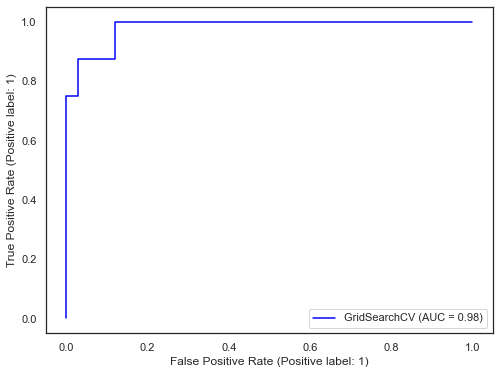

In [65]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_lda, X_test_std, y_test, ax=ax, color='blue');

<a id="support_vector_machines"></a>

# Support Vector Machines

In [66]:
from sklearn.svm import SVC

param_grid = {'C': np.power(10, np.arange(0, 3, dtype=float)),
              'kernel': ['linear', 'sigmoid', 'rbf'], 
              'gamma': ['auto', 'scale']}

svc_clf = SVC(random_state=0)

gs_svc = GridSearchCV(svc_clf, param_grid=param_grid)

start = time()
gs_svc.fit(X_train_std, y_train)
svc_duration = time() - start

print("GridSearchCV of SVC took {:.2f} seconds for {} candidate parameter settings.".format(svc_duration, 
                                                                                            len(gs_svc.cv_results_['params'])))
# report(gs_svc.cv_results_)
print('Optimal C: {}  Optimal kernel: {}  Optimal gamma: {}'.format(gs_svc.best_params_['C'], gs_svc.best_params_['kernel'], gs_svc.best_params_['gamma']))
print('Accuracy (train): {:.2f}'.format(gs_svc.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_svc.score(X_test_std,  y_test)))

GridSearchCV of SVC took 5.71 seconds for 18 candidate parameter settings.
Optimal C: 1.0  Optimal kernel: sigmoid  Optimal gamma: scale
Accuracy (train): 1.00
Accuracy  (test): 1.00


## Cross-validation score on test set

In [67]:
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'support vector machines')
svc_cv.round(2)

mean                  0.67
standard deviation    0.37
p025                  0.07
p975                  1.00
Name: support vector machines, dtype: float64

## Confusion matrix

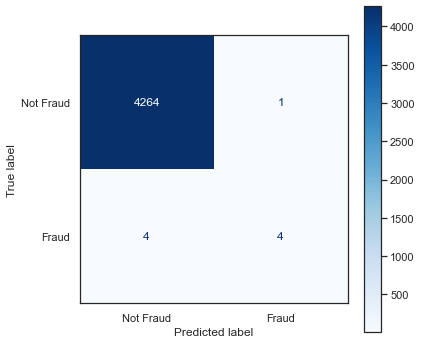

In [68]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_svc, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [69]:
y_pred = gs_svc.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       0.80      0.50      0.62         8

    accuracy                           1.00      4273
   macro avg       0.90      0.75      0.81      4273
weighted avg       1.00      1.00      1.00      4273



## A collection of metrics for comparing models

In [70]:
svc_metrics = calculate_metrics(y_test, y_pred, svc_duration, 'support vector machines')
svc_metrics

accuracy                                                  0.99883
precision                                                     0.8
recall                                                        0.5
roc_auc                                                  0.749883
f1_score                                                 0.615385
cohen_kappa                                               0.61483
precision_both                          [0.9990627928772259, 0.8]
recall_both                             [0.9997655334114889, 0.5]
fbeta_both               [0.9994140396109223, 0.6153846153846154]
support_both                                            [4265, 8]
time_to_fit (seconds)                                    5.707035
Name: support vector machines, dtype: object

## ROC curve

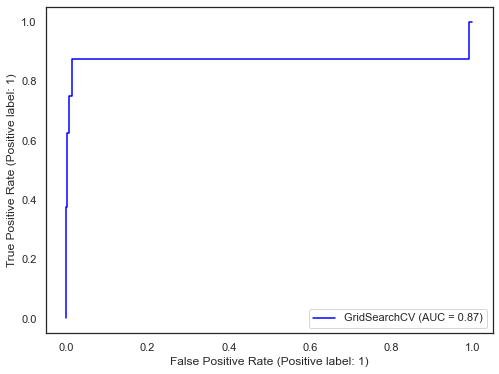

In [71]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_svc, X_test_std, y_test, ax=ax, color='blue');

<a id="random_forest"></a>

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(100, 800, 200, dtype=int),
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth': [None, 3, 5]}

rf_clf = RandomForestClassifier(oob_score=True, random_state=0)

gs_rf = GridSearchCV(rf_clf, param_grid=param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_duration = time() - start

print("GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings.".format(rf_duration, 
                                                                                           len(gs_rf.cv_results_['params'])))
# report(gs_rf.cv_results_)
print('Optimal n_estimators: {}  Optimal max_features: {}  Optimal max_depth: {}'.format(gs_rf.best_params_['n_estimators'], 
                                                                                         gs_rf.best_params_['max_features'], 
                                                                                         gs_rf.best_params_['max_depth']))
print('Accuracy (train): {:.2f}'.format(gs_rf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_rf.score(X_test_std,  y_test)))

GridSearchCV of RF took 1285.53 seconds for 36 candidate parameter settings.
Optimal n_estimators: 100  Optimal max_features: sqrt  Optimal max_depth: None
Accuracy (train): 1.00
Accuracy  (test): 1.00


## Cross-validation score on test set

In [74]:
clf_rf = RandomForestClassifier(n_estimators=gs_rf.best_params_['n_estimators'], 
                                max_features=gs_rf.best_params_['max_features'], 
                                max_depth=gs_rf.best_params_['max_depth'], 
                                oob_score=True, 
                                random_state=0)

rf_cv = get_cross_val(clf_rf, X_test_std, y_test, 'random forest')
rf_cv.round(2)

mean                  0.47
standard deviation    0.40
p025                  0.00
p975                  0.97
Name: random forest, dtype: float64

## Confusion matrix

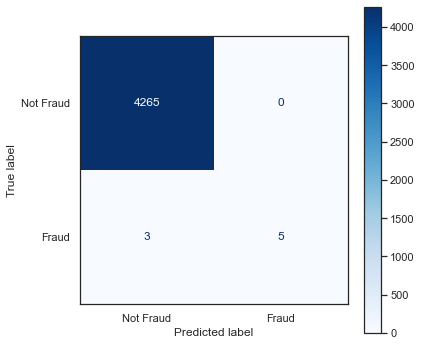

In [75]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_rf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [76]:
y_pred = gs_rf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       1.00      0.62      0.77         8

    accuracy                           1.00      4273
   macro avg       1.00      0.81      0.88      4273
weighted avg       1.00      1.00      1.00      4273



## A collection of metrics for comparing models

In [77]:
rf_metrics = calculate_metrics(y_test, y_pred, rf_duration, 'random forest')
rf_metrics

accuracy                                                 0.999298
precision                                                     1.0
recall                                                      0.625
roc_auc                                                    0.8125
f1_score                                                 0.769231
cohen_kappa                                              0.768898
precision_both                          [0.9992970946579194, 1.0]
recall_both                                          [1.0, 0.625]
fbeta_both               [0.9996484237665534, 0.7692307692307693]
support_both                                            [4265, 8]
time_to_fit (seconds)                                 1285.529596
Name: random forest, dtype: object

## ROC curve

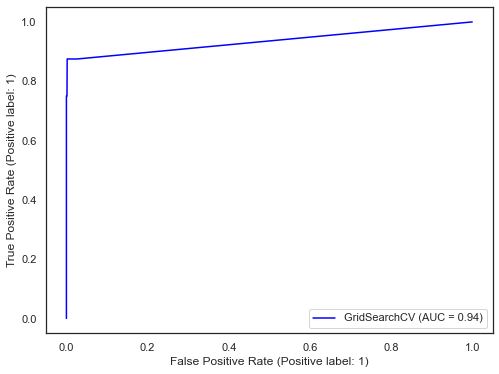

In [78]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_rf, X_test_std, y_test, ax=ax, color='blue');

## Variable importances in the random forest model

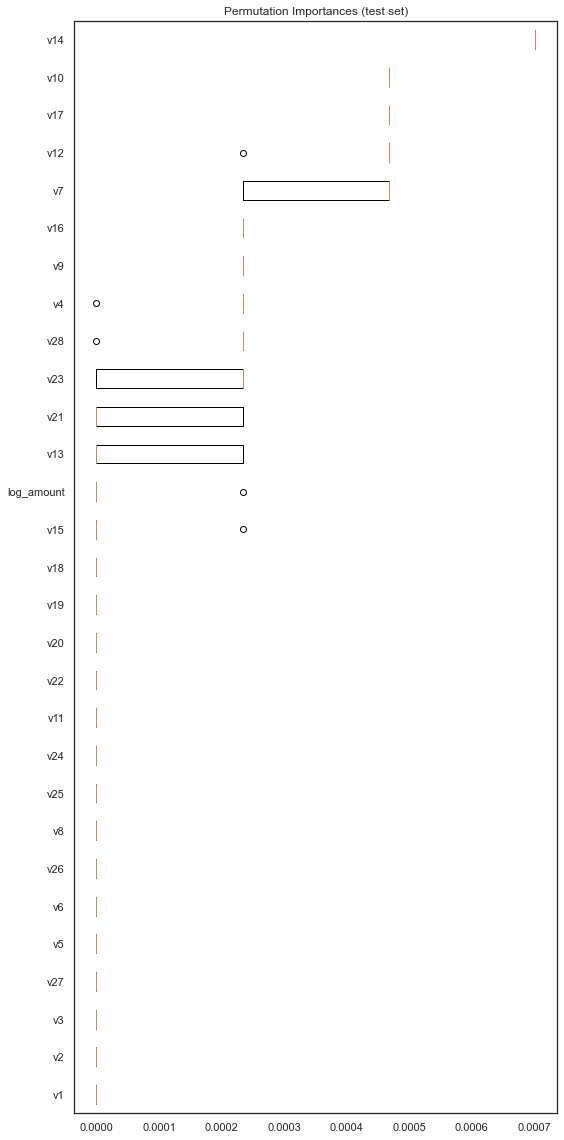

In [79]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns=list(data.columns)[1:])

f, ax = plt.subplots(figsize=(8,16))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.tight_layout();

<a id="compare_models"></a>

# Compare Models

## Classification metrics scores and time-to-fit models (in seconds)

In [80]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, rf_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 2) for val in elem]).sort_values(by='f1_score', ascending=False)

,accuracy,precision,recall,roc_auc,f1_score,cohen_kappa,precision_both,recall_both,fbeta_both,support_both,time_to_fit (seconds)
linear discriminant analysis,1.0,1.0,0.75,0.88,0.86,0.86,"[1.0, 1.0]","[1.0, 0.75]","[1.0, 0.86]","[4265, 8]",0.56
logistic_regression,1.0,1.0,0.62,0.81,0.77,0.77,"[1.0, 1.0]","[1.0, 0.62]","[1.0, 0.77]","[4265, 8]",42.28
k-nearest neighbors,1.0,1.0,0.62,0.81,0.77,0.77,"[1.0, 1.0]","[1.0, 0.62]","[1.0, 0.77]","[4265, 8]",8.96
random forest,1.0,1.0,0.62,0.81,0.77,0.77,"[1.0, 1.0]","[1.0, 0.62]","[1.0, 0.77]","[4265, 8]",1285.53
support vector machines,1.0,0.8,0.50,0.75,0.62,0.61,"[1.0, 0.8]","[1.0, 0.5]","[1.0, 0.62]","[4265, 8]",5.71


## Cross-validation scores on test set

In [81]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, rf_cv], axis=1).T

cross_vals = cross_vals.round(2).sort_values(by='mean', ascending=False)
cross_vals

,mean,standard deviation,p025,p975
linear discriminanat analysis,0.76,0.13,0.67,0.98
k-nearest neighbors,0.73,0.39,0.07,1.00
support vector machines,0.67,0.37,0.07,1.00
logistic regression,0.53,0.28,0.05,0.79
random forest,0.47,0.40,0.00,0.97


## Plot of mean (+/- std) cross-validation scores

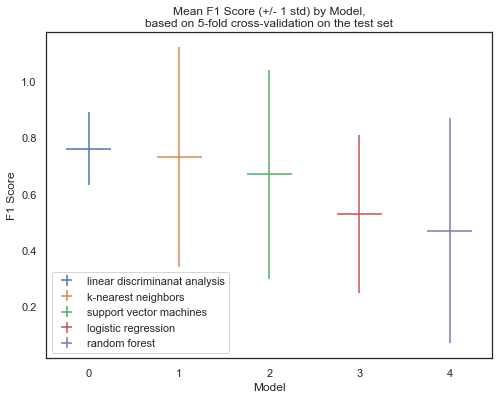

In [82]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

#plt.ylim(0.7,1)
plt.title('Mean F1 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc='lower left');

<a id="oversampling"></a>

# [Oversampling](https://github.com/scikit-learn-contrib/imbalanced-learn/wiki)

## Using [NumPy](https://numpy.org/devdocs/)

In [83]:
bool_y_train = y_train != 0

pos_features = X_train_std[bool_y_train]
neg_features = X_train_std[~bool_y_train]

pos_labels = y_train[bool_y_train]
neg_labels = y_train[~bool_y_train]

pos_features.shape, neg_features.shape

((17, 29), (9951, 29))

## Oversample the minority class

In [84]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels   = pos_labels[choices]

res_pos_features.shape, res_pos_labels.shape

((9951, 29), (9951,))

# Recombine oversampled minority class and majority class

In [85]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels   = np.concatenate([res_pos_labels,   neg_labels],   axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)

resampled_features = resampled_features[order]
resampled_labels   = resampled_labels[order]

resampled_features.shape, resampled_labels.shape

((19902, 29), (19902,))

# Linear Discriminant Analysis

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'], 
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda_resamp = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda_resamp.fit(resampled_features, resampled_labels)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration, 
                                                                                            len(gs_lda_resamp.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda_resamp.best_params_['solver'], 
                                                                                   gs_lda_resamp.best_params_['shrinkage'], 
                                                                                   gs_lda_resamp.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda_resamp.score(resampled_features, resampled_labels)))
print('Accuracy  (test): {:.2f}'.format(gs_lda_resamp.score(X_test_std,  y_test)))

GridSearchCV of LDA took 1.04 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: auto  Optimal n_components: 1
Accuracy (train): 0.99
Accuracy  (test): 0.98


# Using [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)

# Oversample the minority class

In [88]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X_train_std, y_train)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 9951), (1, 9951)]


# Linear Discriminant Analysis

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'], 
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda_resamp = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda_resamp.fit(resampled_features, resampled_labels)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration, 
                                                                                            len(gs_lda_resamp.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda_resamp.best_params_['solver'], 
                                                                                   gs_lda_resamp.best_params_['shrinkage'], 
                                                                                   gs_lda_resamp.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda_resamp.score(resampled_features, resampled_labels)))
print('Accuracy  (test): {:.2f}'.format(gs_lda_resamp.score(X_test_std,  y_test)))

GridSearchCV of LDA took 1.09 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: auto  Optimal n_components: 1
Accuracy (train): 0.99
Accuracy  (test): 0.98


<a id="statsmodels"></a>

# [Statsmodels](https://www.statsmodels.org/stable/index.html)

In [90]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Instantiate the model
logit = sm.Logit(y_train, X_train_std)

# Fit the model
result = logit.fit()

# View the model summary
result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 9968
Model:                          Logit   Df Residuals:                     9939
Method:                           MLE   Df Model:                           28
Date:                Thu, 16 Jun 2022   Pseudo R-squ.:                    -inf
Time:                        15:08:34   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -125.34
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -7.9346      0.139    -57.151      0.000      -8.207      -7.663
x2             6.8092      0.121     56.123      0.000       6.571       7.047
x3           -13.6808      0.237    -57.817      0.000     -14.145     -13.217
x4             7.6140      0.134     56.993      0.000       7.352       7.876
x5            -8.9805      0.157    -57.067      0.000      -9.289      -8.672
x6            -2.8432      0.056    -50.669      0.000      -2.953      -2.733
x7           -15.2424      0.264    -57.753      0.000     -15.760     -14.725
x8             3.6959      0.070     53.053      0.000       3.559       3.832
x9            -6.2802      0.111    -56.389      0.000      -6.499      -6.062
x10          -14.1224      0.245    -57.752      0.000     -14.602     -13.643
x11            9.4848      0.165     57.371      0.000       9.161       9.809
x12          -16.6725      0.288    -57.863      0.000     -17.237     -16.108
x13            0.2105      0.027      7.899      0.000       0.158       0.263
x14          -16.4009      0.283    -57.880      0.000     -16.956     -15.846
x15           -0.3514      0.027    -12.913      0.000      -0.405      -0.298
x16          -13.5705      0.235    -57.723      0.000     -14.031     -13.110
x17          -23.7609      0.410    -57.984      0.000     -24.564     -22.958
x18           -8.8383      0.154    -57.254      0.000      -9.141      -8.536
x19            2.8058      0.055     50.910      0.000       2.698       2.914
x20            1.5789      0.040     39.721      0.000       1.501       1.657
x21            1.9319      0.043     44.916      0.000       1.848       2.016
x22            0.1489      0.027      5.537      0.000       0.096       0.202
x23           -0.1323      0.030     -4.460      0.000      -0.190      -0.074
x24           -0.1007      0.026     -3.809      0.000      -0.153      -0.049
x25            0.3479      0.028     12.301      0.000       0.292       0.403
x26            0.1086      0.027      4.066      0.000       0.056       0.161
x27            1.0266      0.034     30.228      0.000       0.960       1.093
x28            0.3900      0.027     14.318      0.000       0.337       0.443
x29            0.0102      0.032      0.313      0.754      -0.053       0.074
==============================================================================
"""

In [91]:
# View odds ratios and 95% CIs
# Source: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html
params = result.params

conf = result.conf_int()

conf = pd.DataFrame(conf, columns=['2.5%', '97.5%'])
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

np.exp(conf).round(3)

,2.5%,97.5%,OR
0,0.000,0.000,0.000
1,714.403,1149.457,906.187
2,0.000,0.000,0.000
3,1559.600,2632.986,2026.427
4,0.000,0.000,0.000
5,0.052,0.065,0.058
6,0.000,0.000,0.000
7,35.141,46.175,40.282
8,0.002,0.002,0.002
9,0.000,0.000,0.000


In [92]:
# View marginal effects of the fitted model
# Source: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html
marginal_effects = result.get_margeff()
marginal_effects.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1504      0.004   -322.373      0.000      -1.157      -1.143
x2             0.9873      0.005    213.583      0.000       0.978       0.996
x3            -1.9836      0.003   -567.692      0.000      -1.990      -1.977
x4             1.1039      0.004    287.015      0.000       1.096       1.111
x5            -1.3021      0.004   -302.269      0.000      -1.311      -1.294
x6            -0.4122      0.004   -103.237      0.000      -0.420      -0.404
x7            -2.2100      0.004   -498.144      0.000      -2.219      -2.201
x8             0.5359      0.004    129.602      0.000       0.528       0.544
x9            -0.9106      0.004   -230.466      0.000      -0.918      -0.903
x10           -2.0476      0.004   -499.718      0.000      -2.056      -2.040
x11            1.3752      0.004    354.116      0.000       1.368       1.383
x12           -2.4173      0.004   -585.905      0.000      -2.425      -2.409
x13            0.0305      0.004      7.973      0.000       0.023       0.038
x14           -2.3780      0.004   -603.822      0.000      -2.386      -2.370
x15           -0.0509      0.004    -13.241      0.000      -0.058      -0.043
x16           -1.9676      0.004   -482.203      0.000      -1.976      -1.960
x17           -3.4451      0.004   -800.726      0.000      -3.453      -3.437
x18           -1.2815      0.004   -330.607      0.000      -1.289      -1.274
x19            0.4068      0.004    105.666      0.000       0.399       0.414
x20            0.2289      0.004     54.282      0.000       0.221       0.237
x21            0.2801      0.004     70.664      0.000       0.272       0.288
x22            0.0216      0.004      5.562      0.000       0.014       0.029
x23           -0.0192      0.004     -4.474      0.000      -0.028      -0.011
x24           -0.0146      0.004     -3.817      0.000      -0.022      -0.007
x25            0.0504      0.004     12.583      0.000       0.043       0.058
x26            0.0157      0.004      4.076      0.000       0.008       0.023
x27            0.1488      0.004     35.389      0.000       0.141       0.157
x28            0.0565      0.004     14.779      0.000       0.049       0.064
x29            0.0015      0.005      0.313      0.754      -0.008       0.011
==============================================================================
"""

# [Predict](https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html)

In [93]:
# Make predictions
y_pred = result.predict(X_test_std)
y_pred

array([0.20609537, 0.18693256, 0.21486332, ..., 0.12687692, 0.21070143,
       0.20863254])

In [94]:
# Convert predicted probabilities to predicted classes
y_pred_class = np.where(y_pred > 0.50, 1, 0)
y_pred_class

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
print(classification_report(y_test, y_pred_class, 
                            target_names=y_labels))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      4265
       Fraud       0.86      0.75      0.80         8

    accuracy                           1.00      4273
   macro avg       0.93      0.87      0.90      4273
weighted avg       1.00      1.00      1.00      4273



[Back to top](#top)